# 유방암 데이터 셋
- feature 갯수를 10,5,2로 축소
- 각각의 경우 분류 성능측정
- 2개로 차원 축소 -> 시각화

In [155]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [156]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [157]:
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
342,11.06,14.96,71.49,373.9,0.10330,0.09097,0.053970,0.033410,0.1776,0.06907,0.1601,0.8225,1.355,10.800,0.007416,0.018770,0.027580,0.010100,0.02348,0.002917,11.92,19.90,79.76,440.0,0.1418,0.22100,0.229900,0.10750,0.3301,0.09080
389,19.55,23.21,128.90,1174.0,0.10100,0.13180,0.185600,0.102100,0.1989,0.05884,0.6107,2.8360,5.383,70.100,0.011240,0.040970,0.074690,0.034410,0.02768,0.006240,20.82,30.44,142.00,1313.0,0.1251,0.24140,0.382900,0.18250,0.2576,0.07602
376,10.57,20.22,70.15,338.3,0.09073,0.16600,0.228000,0.059410,0.2188,0.08450,0.1115,1.2310,2.363,7.228,0.008499,0.076430,0.153500,0.029190,0.01617,0.012200,10.85,22.82,76.51,351.9,0.1143,0.36190,0.603000,0.14650,0.2597,0.12000
58,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,0.4040,1.2140,2.595,32.960,0.007491,0.008593,0.000692,0.004167,0.02190,0.002990,14.23,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289
542,14.74,25.42,94.70,668.6,0.08275,0.07214,0.041050,0.030270,0.1840,0.05680,0.3031,1.3850,2.177,27.410,0.004775,0.011720,0.019470,0.012690,0.01870,0.002626,16.51,32.29,107.40,826.4,0.1060,0.13760,0.161100,0.10950,0.2722,0.06956


scale 처리

In [158]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cancer_std = scaler.fit_transform(cancer.data)

### PCA

In [159]:
pca = PCA(n_components=10)
cancer_pca10 = pca.fit_transform(cancer_std)
pca = PCA(n_components=5)
cancer_pca5 = pca.fit_transform(cancer_std)
pca = PCA(n_components=2)
cancer_pca2 = pca.fit_transform(cancer_std)
print(cancer_pca10.shape,cancer_pca5.shape,cancer_pca2.shape)


(569, 10) (569, 5) (569, 2)


## 축소하기전 데이터로 분류

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, test_size=0.3, random_state=2021
)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.9122807017543859

In [161]:
pc_list = ['PC'+ str(i) for i in range(1,11)]
cancer_pca2_df = pd.DataFrame(data=cancer_pca2, columns=pc_list[:2])
cancer_pca2_df['target'] = cancer.target
cancer_pca5_df = pd.DataFrame(data=cancer_pca5, columns=pc_list[:5])
cancer_pca5_df['target'] = cancer.target
cancer_pca10_df = pd.DataFrame(data=cancer_pca10, columns=pc_list[:10])
cancer_pca10_df['target'] = cancer.target

## 축소후 데이터 분류

In [183]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca10_df[cancer_pca10_df.columns.difference(['target'])], cancer.target, stratify=cancer.target, 
    test_size=0.3, random_state=2021
)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.9122807017543859

In [187]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca5_df[cancer_pca5_df.columns.difference(['target'])], cancer.target, stratify=cancer.target, 
    test_size=0.3, random_state=2021
)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.9298245614035088

In [188]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca2_df[cancer_pca2_df.columns.difference(['target'])], cancer.target, stratify=cancer.target, 
    test_size=0.3, random_state=2021
)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.9239766081871345

## 2개 차원축소로 시각화

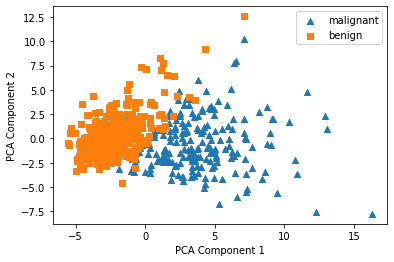

In [165]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers[:2]):
    x_axis_data = cancer_pca2_df[cancer_pca2_df['target']==i]['PC1']
    y_axis_data = cancer_pca2_df[cancer_pca2_df['target']==i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
                label=cancer.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()